<a href="https://colab.research.google.com/github/HyVeel/eksploracja-danych/blob/main/zaj13/zad13_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zastosuj PCA do zbioru Wine w celu redukcji wymiarowości i analizy struktury danych

## Część 1: Przygotowanie danych

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### 1.1  Załaduj zbiór danych Wine

In [2]:
wine = load_wine()
X = wine.data                    # 178 próbek × 13 cechy
y = wine.target                  # 3 klasy
feature_names = wine.feature_names
target_names = wine.target_names

### 1.2 Wyświetl: liczbę próbek i cech, nazwy cech, rozkład klas

In [3]:
print(f"\nWymiary danych: {X.shape[0]} próbek × {X.shape[1]} cechy")
print(f"Cechy: {feature_names}")
print(f"Klasy: {target_names}")


Wymiary danych: 178 próbek × 13 cechy
Cechy: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Klasy: ['class_0' 'class_1' 'class_2']


### 1.3 Przeprowadź standaryzację. Wyjaśnij, dlaczego jest konieczna przed PCA

In [4]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

print("\n" + "-" * 60)
print("STANDARYZACJA (mean=0, std=1)")
print("-" * 60)
print(f"Przed: średnie = {X.mean(axis=0).round(0)}")
print(f"Po:    średnie = {X_std.mean(axis=0).round(2)}")


------------------------------------------------------------
STANDARYZACJA (mean=0, std=1)
------------------------------------------------------------
Przed: średnie = [ 13.   2.   2.  19. 100.   2.   2.   0.   2.   5.   1.   3. 747.]
Po:    średnie = [ 0.  0. -0. -0. -0. -0.  0. -0. -0. -0.  0.  0. -0.]


Odpowiedź: PCA jest wrażliwe na skalę - zmienne o większej wariancji dominują! Dlatego ZAWSZE standaryzujemy dane przed PCA

## Część 2: Wykonanie PCA

###  2.1 Wykonaj PCA (wszystkie składowe)

In [5]:
pca = PCA()
X_pca = pca.fit_transform(X_std)

### 2.2 Wyświetl: wartości własne, % wyjaśnionej wariancji, skumulowaną wariancję

In [6]:
print("\n" + "-" * 60)
print("WYNIKI PCA")
print("-" * 60)

# Wartości własne (eigenvalues) - pokazują "siłę" każdej składowej
print("\nWartości własne (eigenvalues):")
for i, ev in enumerate(pca.explained_variance_):
    print(f"  PC{i+1}: {ev:.3f}")

# Procent wyjaśnionej wariancji - kluczowa metryka!
print("\nWyjaśniona wariancja (%):")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"  PC{i+1}: {var*100:.1f}%")

# Skumulowana wariancja - ile łącznie wyjaśniają składowe
print(f"\nSkumulowana wariancja:")
cumsum = np.cumsum(pca.explained_variance_ratio_)
for i, cs in enumerate(cumsum):
    print(f"  PC1-PC{i+1}: {cs*100:.1f}%")


------------------------------------------------------------
WYNIKI PCA
------------------------------------------------------------

Wartości własne (eigenvalues):
  PC1: 4.732
  PC2: 2.511
  PC3: 1.454
  PC4: 0.924
  PC5: 0.858
  PC6: 0.645
  PC7: 0.554
  PC8: 0.350
  PC9: 0.291
  PC10: 0.252
  PC11: 0.227
  PC12: 0.170
  PC13: 0.104

Wyjaśniona wariancja (%):
  PC1: 36.2%
  PC2: 19.2%
  PC3: 11.1%
  PC4: 7.1%
  PC5: 6.6%
  PC6: 4.9%
  PC7: 4.2%
  PC8: 2.7%
  PC9: 2.2%
  PC10: 1.9%
  PC11: 1.7%
  PC12: 1.3%
  PC13: 0.8%

Skumulowana wariancja:
  PC1-PC1: 36.2%
  PC1-PC2: 55.4%
  PC1-PC3: 66.5%
  PC1-PC4: 73.6%
  PC1-PC5: 80.2%
  PC1-PC6: 85.1%
  PC1-PC7: 89.3%
  PC1-PC8: 92.0%
  PC1-PC9: 94.2%
  PC1-PC10: 96.2%
  PC1-PC11: 97.9%
  PC1-PC12: 99.2%
  PC1-PC13: 100.0%


### 2.3 Ile składowych potrzeba dla ≥ 80% wariancji

Dla ≥ 80% wariancji potrzeba 5 składowych

## Część 3: Wizualizacja

### 3.1. Scree Plot - zaznacz (łokieć)

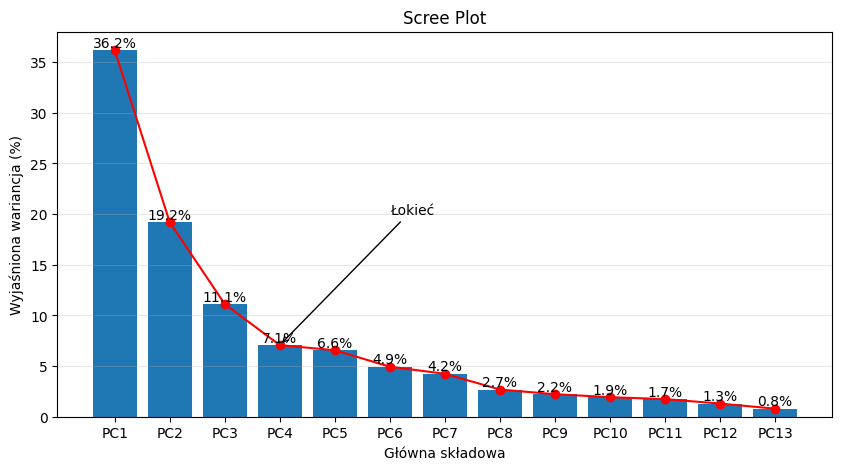

In [7]:
pc_labels = [f"PC{i+1}" for i in range(len(feature_names))]
variance_pct = pca.explained_variance_ratio_ * 100

plt.figure(figsize=(10, 5))
bars = plt.bar(pc_labels, variance_pct)
plt.plot(pc_labels, variance_pct, "ro-")
plt.ylabel("Wyjaśniona wariancja (%)")
plt.xlabel("Główna składowa")
plt.title("Scree Plot")

# Adnotacje na słupkach
for bar, pct in zip(bars, variance_pct):
    plt.annotate(f"{pct:.1f}%", xy=(bar.get_x() + bar.get_width()/2, bar.get_height()), ha="center", va="bottom")

# Zaznaczenie "łokcia"
plt.annotate("Łokieć", xy=(3, variance_pct[3]), xytext=(5, 20), arrowprops=dict(arrowstyle="->"))
plt.grid(axis="y", alpha=0.3)

### 3.2. Projekcja 2D (PC1 vs PC2) z kolorami klas

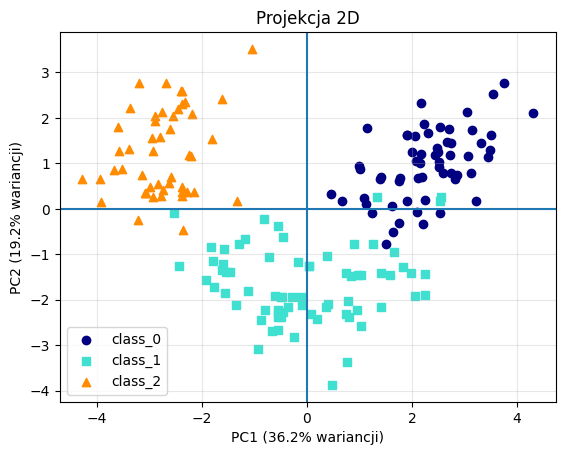

In [8]:
colors = ["navy", "turquoise", "darkorange"]
markers = ["o", "s", "^"]

for i, (name, color, marker) in enumerate(zip(target_names, colors, markers)):
    mask = y == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=color, marker=marker, label=name)

plt.xlabel(f"PC1 ({variance_pct[0]:.1f}% wariancji)")
plt.ylabel(f"PC2 ({variance_pct[1]:.1f}% wariancji)")
plt.title("Projekcja 2D")
plt.legend()
plt.axhline(y=0)
plt.axvline(x=0)
plt.grid(True, alpha=0.3)

### 3.3. Biplot - punkty danych + wektory cech

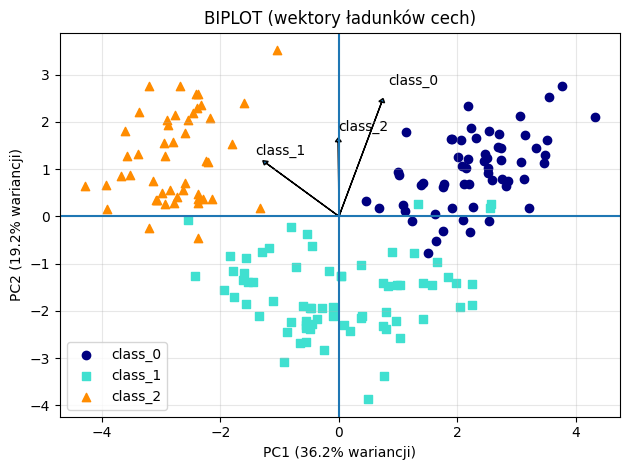

In [9]:
# Punkty danych
for i, (name, color, marker) in enumerate(zip(target_names, colors, markers)):
    mask = y == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=color, marker=marker, label=name)

# Wektory cech (loadings) - pokazują kierunek i siłę wpływu każdej cechy
scale = 5  # skalowanie wektorów dla widoczności

for i, name in enumerate(target_names):
    if i == 3:
        plt.arrow(0, 0,
              pca.components_[0, i] * scale,
              pca.components_[1, i] * scale,
              head_width=0.1, head_length=0.08)
        plt.text(pca.components_[0, i] * scale * 1.15,
             pca.components_[1, i] * scale * 1.65, name)
    else:
        plt.arrow(0, 0,
              pca.components_[0, i] * scale,
              pca.components_[1, i] * scale,
              head_width=0.1, head_length=0.08)
        plt.text(pca.components_[0, i] * scale * 1.15,
             pca.components_[1, i] * scale * 1.15, name)

plt.xlabel(f"PC1 ({variance_pct[0]:.1f}% wariancji)")
plt.ylabel(f"PC2 ({variance_pct[1]:.1f}% wariancji)")
plt.title("BIPLOT (wektory ładunków cech)")
plt.legend()
plt.axhline(y=0)
plt.axvline(x=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Część 4: Interpretacja

### 4.1. Wyświetl ładunki (loadings) dla PC1 i PC2

In [10]:
print(f"{"feature":<30}|\tPC1\tPC2")
print("-" * 50)

for i, name in enumerate(feature_names):
    loadings = pca.components_[:, i]
    print(f"{name:<30}|\t{loadings[0]:.2f}\t{loadings[1]:.2f}")

feature                       |	PC1	PC2
--------------------------------------------------
alcohol                       |	0.14	0.48
malic_acid                    |	-0.25	0.22
ash                           |	-0.00	0.32
alcalinity_of_ash             |	-0.24	-0.01
magnesium                     |	0.14	0.30
total_phenols                 |	0.39	0.07
flavanoids                    |	0.42	-0.00
nonflavanoid_phenols          |	-0.30	0.03
proanthocyanins               |	0.31	0.04
color_intensity               |	-0.09	0.53
hue                           |	0.30	-0.28
od280/od315_of_diluted_wines  |	0.38	-0.16
proline                       |	0.29	0.36


### 4.2. Odpowiedz:
- Które cechy dominują w PC1? Co reprezentuje ta składowa?
- Które cechy dominują w PC2?
- Czy klasy są dobrze separowalne w 2D?

Odpowiedzi:
- W PC1 dominują: flavanoids (Rodzaj fenoli), total_phenols (Związki fenolowe) i od280/od315_of_diluted_wines (Stosunek absorbancji)
- W PC2 dominują: color_intensity (Głębokość koloru) i alcohol (Zawartość alkoholu (%))
- Tak, klasy są w miarę dobrze separowalne w 2D